In [7]:
import pandas as pd
import numpy as np



In [8]:
# reading the dataset
# The dataset is a CSV file containing SMS messages labeled as spam or ham
df = pd.read_csv("spam.csv", encoding="iso-8859-1")

df.shape

(5572, 5)

In [9]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2138,ham,K still are you loving me.,NaN,NaN,NaN
2049,ham,How much is blackberry bold2 in nigeria.,NaN,NaN,NaN
150,ham,The wine is flowing and i'm i have nevering..,NaN,NaN,NaN
2720,ham,Ok lor...,NaN,NaN,NaN
2047,ham,No de. But call me after some time. Ill tell y...,NaN,NaN,NaN


## Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
# Encoding the labels (spam and ham) into numerical values
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

df.sample(15)


,label,message
1931,0,What pa tell me.. I went to bath:-)
759,0,"Call me when you/carlos is/are here, my phone'..."
4666,0,I send the print outs da.
4979,0,So what u doing today?
1647,0,Evening * v good if somewhat event laden. Will...
4386,0,S.i'm watching it in live..
836,1,Do you want 750 anytime any network mins 150 t...
3971,0,WOT U UP 2 J?
1882,0,"Sorry, I can't help you on this."
1366,0,Bbq this sat at mine from 6ish. Ur welcome 2 come


In [13]:
# check for null values
df.isnull().sum()

label      0
message    0
dtype: int64

In [14]:
# checking for duplicates
df.duplicated().sum()




np.int64(403)

In [15]:
# removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()
df.shape

(5169, 2)

## exploratory data analysis

In [16]:
# value counts of the labels
df["label"].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Spam and Ham Messages')

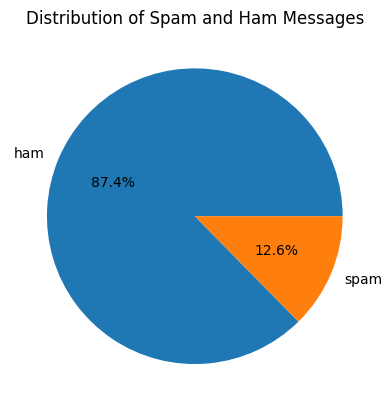

In [17]:
# pie chart for the distribution of spam and ham messages
import matplotlib.pyplot as plt
plt.pie(df["label"].value_counts(), labels=["ham", "spam"], autopct="%1.1f%%")
plt.title("Distribution of Spam and Ham Messages")

In [18]:
import nltk  ## natural language toolkit 


In [19]:
nltk.download("punkt") ## downloading the punkt tokenizer for tokenizing the messages
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /home/no0ne/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/no0ne/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
df["num_characters"] = df["message"].apply(len)  ## counting the number of characters in each message
df.head( )

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# number of words in each message
df["word_count"] = [len(nltk.word_tokenize(text)) for text in df["message"]]
df.head()


,label,message,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
# sentence count
df["num_sentences"] = [len(nltk.sent_tokenize(text)) for text in df["message"]]
df.head()

,label,message,num_characters,word_count,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
# describe ham
df[df["label"] == 0][["num_characters", "word_count", "num_sentences"]].describe()

,num_characters,word_count,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# describe spam
df[df["label"] == 1][["num_characters", "word_count", "num_sentences"]].describe()

,num_characters,word_count,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

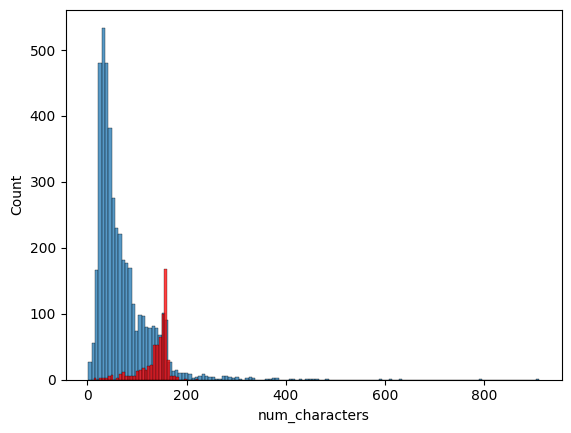

In [25]:
# plotting histogram for ham and spam messages
import seaborn as sns
sns.histplot(df[df["label"] == 0]["num_characters"])
sns.histplot(df[df["label"] == 1]["num_characters"] , color="red")
# plt.title("Distribution of Characters in Ham and Spam Messages")
# plt.xlabel("Number of Characters")
# plt.ylabel("Frequency")
# plt.legend(["Ham", "Spam"])
# plt.show()


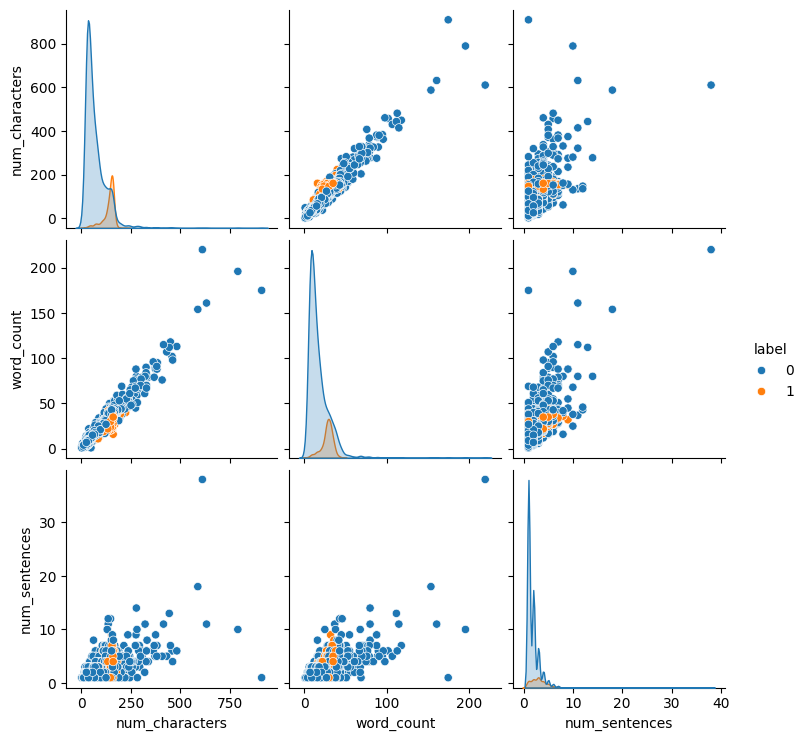

In [26]:
sns.pairplot(df, hue="label", diag_kind="kde")

## Data Preprocessing

In [27]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
# downloading the stopwords
nltk.download("stopwords")  # downloading the stopwords
# removing stopwords and punctuation
def transform_text(text):
    text = text.lower()  # converting to lowercase
    text = nltk.word_tokenize(text)  # tokenizing the text
    text = [word for word in text if word.isalnum()]  # removing special characters
    text = [word for word in text if word not in stopwords.words("english") and word not in punctuation] 
    ps = PorterStemmer()  # creating an object of the PorterStemmer class
    text = [ps.stem(word) for word in text]  # stemming the words
    return " ".join(text)  # joining the words back into a string
# df["message"] = df["message"].apply(tranform_text)  # applying the function to the message column

[nltk_data] Downloading package stopwords to /home/no0ne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# transforming every message in the dataset
df["transformed_text"] = [transform_text(text) for text in df["message"]]
df.head()

,label,message,num_characters,word_count,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
# creatting a word cloud for important word in ham and spams 
from wordcloud import WordCloud
wc = WordCloud(width=800, height=800, background_color="white", min_font_size=10)

# for spam
spam_wc = wc.generate(" ".join(df[df["label"] == 1]["transformed_text"])) 

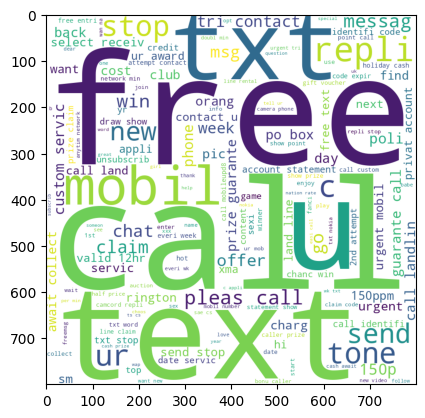

In [30]:
plt.imshow(spam_wc)

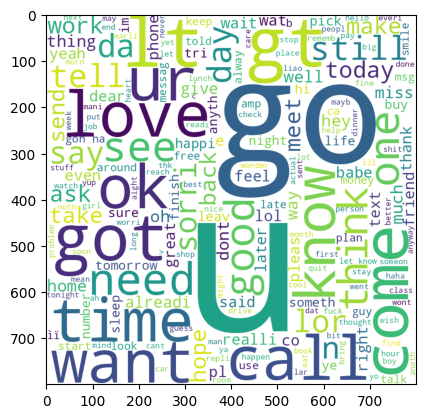

In [31]:
# for ham 
ham_wc = wc.generate(" ".join(df[df["label"] == 0]["transformed_text"])) 
plt.imshow(ham_wc)

In [32]:
# getting the top 30 words in spam and ham messages
# for spam 
spam_corpus = []
for message in df[df["label"] == 1]["transformed_text"].to_list():
    for word in message.split():
        spam_corpus.append(word)

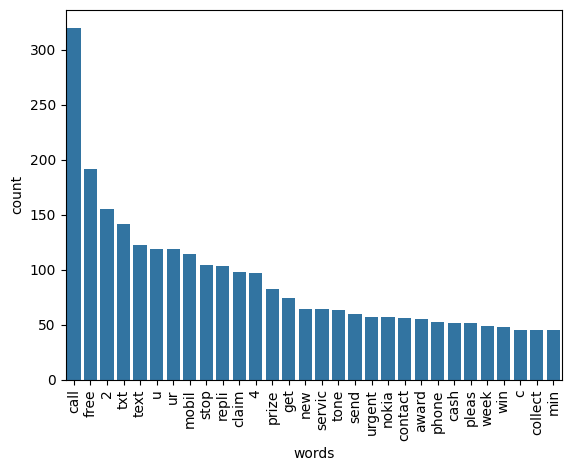

In [33]:
from collections import Counter
Counter(spam_corpus) ## this will give the count of each word in spam messages
# getting the top 30 words in spam messages
commonDf = pd.DataFrame(Counter(spam_corpus).most_common(30))
commonDf.columns = ["words", "count"]
# print(commonDf)
sns.barplot(x = "words", y= "count", data=commonDf)
plt.xticks(rotation="vertical")
plt.show()



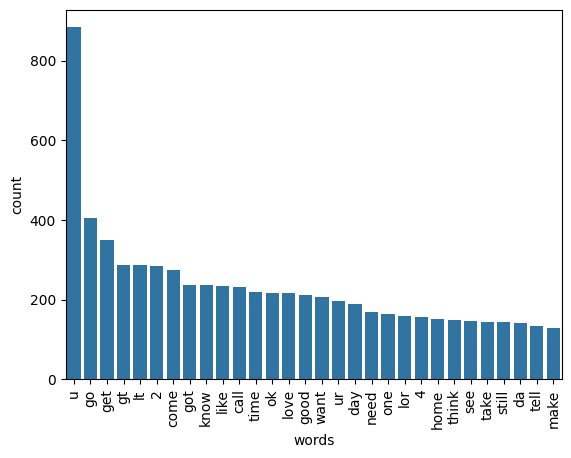

In [34]:
# for ham
ham_corpus = []
for message in df[df["label"] == 0]["transformed_text"].to_list():
    for word in message.split():
        ham_corpus.append(word)
Counter(ham_corpus) ## this will give the count of each word in ham messages
commonHamDf = pd.DataFrame(Counter(ham_corpus).most_common(30))
commonHamDf.columns = ["words", "count"]
# print(commonDf)
sns.barplot(x = "words", y= "count", data=commonHamDf)
plt.xticks(rotation="vertical")
plt.show()

## Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()  # creating an object of the CountVectorizer class
tfidf = TfidfVectorizer()  # creating an object of the TfidfVectorizer class

In [ ]:
# X = cv.fit_transform(df["transformed_text"]).toarray()  # transforming the text into a bag of words
X = tfidf.fit_transform(df["transformed_text"]).toarray()  # transforming the text tfidf

y = df["label"].values  # getting the labels


In [46]:
from sklearn.model_selection import train_test_split
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB # importing the Naive Bayes classifiers
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [47]:
gnb = GaussianNB()  # creating an object of the GaussianNB class
mnb = MultinomialNB()  # creating an object of the MultinomialNB class
bnb = BernoulliNB()  # creating an object of the BernoulliNB class

In [ ]:
gnb.fit(X_train, y_train)  # fitting the model to the training data
y_predictGnb = gnb.predict(X_test)  # predicting the labels for the testing data
print(accuracy_score(y_test, y_predictGnb))  # printing the accuracy of the model
print(confusion_matrix(y_test, y_predictGnb))  # printing the confusion matrix
print(precision_score(y_test, y_predictGnb))  # printing the precision of the model


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
# fitting the MultinomialNB model
mnb.fit(X_train, y_train)  # fitting the model to the training data
y_predictMnb = mnb.predict(X_test)  # predicting the labels for the testing data
print(accuracy_score(y_test, y_predictMnb))  # printing the accuracy of the model
print(confusion_matrix(y_test, y_predictMnb))  # printing the confusion matrix
print(precision_score(y_test, y_predictMnb))  # printing the precision of the model


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:

# fitting the BernoulliNB model
bnb.fit(X_train, y_train)  # fitting the model to the training data
y_predictBnb = bnb.predict(X_test)  # predicting the labels for the testing data
print(accuracy_score(y_test, y_predictBnb))  # printing the accuracy of the model
print(confusion_matrix(y_test, y_predictBnb))  # printing the confusion matrix
print(precision_score(y_test, y_predictBnb))  # printing the precision of the model



0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
